In [3]:
from sokoban import Map, save_images, create_gif
from search_methods.beam_search import BeamSearch
from search_methods.lrta_star import LrtaStar
from search_methods.heuristics import min_weight_manhattan
from search_methods.heuristics import min_weight_manhattan_with_player
from search_methods.heuristics import min_weight_bfs
from search_methods.heuristics import min_weight_bfs_with_player
import matplotlib.pyplot as plt


# Inits
- Starter maps are found in /images/init_maps

In [4]:
""" 
	Store the maps from the .yaml files, organizing them in a map based on their
	advertised difficulty level. 
	Each key will have a corresponding tuple containing the map object and its name as a string
"""
EASY = 'easy'
MEDIUM = 'medium'
HARD = 'hard'
SUPER_HARD = 'super_hard'
LARGE = 'large'
MAP = 1
MAP_NAME = 0

heuristics = [min_weight_manhattan, min_weight_manhattan_with_player, min_weight_bfs, min_weight_bfs_with_player]

def create_steps_images(steps_path, map_name, heur_name, algo_name):
	""" 
		Creates images for each step in the solution and returns their path
	"""
	for i in range(len(steps_path)):
		map = steps_path[i]
		map.save_map(f'images/{map_name}/{algo_name}/{heur_name}/steps', f'{str(i)}')
	return f'images/{map_name}/{algo_name}/{heur_name}/steps'

maps = {}
for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	maps[difficulty] = []
	for i in range(1, 3):
		# There's only one super_hard map
		if difficulty == 'super_hard' and i == 2:
			continue
		map_name = f'{difficulty}_map{str(i)}'
		map_tuple = (map_name, Map.from_yaml(f'tests/{map_name}.yaml'))
		maps[difficulty].append(map_tuple)

for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	for map_tuple in maps[difficulty]:
		map = map_tuple[MAP]
		# remove the .yaml extension
		map_name = map_tuple[MAP_NAME].replace('.yaml', '')
		map.save_map('images/init_maps', map_name)

# Beam-Search

In [5]:
print('#=======================================================================#')

beam_search_explored_states = {}

for heuristic in heuristics:
	for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
		for map_tuple in maps[difficulty]:
			beam_width = 10
			#if difficulty == LARGE and map_tuple[MAP_NAME] == 'large_map2':
			#	beam_width = 23
			solver = BeamSearch(map_tuple[MAP], beam_width, heuristic, allow_pulls=False)
			print(f"------------ Heuristic: {heuristic.__name__} ----------")
			# time the solver
			%time solution_path = solver.solve()
			if solution_path is not None:
				print(f"Found solution for {map_tuple[MAP_NAME]} with a beam width of {beam_width}")
				print(f'Total pull moves: {str(solution_path[-1].undo_moves)}')
				#images_path = create_steps_images(solution_path, map_tuple[MAP_NAME], heuristic.__name__, "beam_search")
				#gif_save_path = images_path.replace('steps', '')
				#create_gif(images_path, 'animated', gif_save_path)
				if not beam_search_explored_states.get(map_tuple[MAP_NAME]):
					beam_search_explored_states[map_tuple[MAP_NAME]] = []
				beam_search_explored_states[map_tuple[MAP_NAME]].append(solver.explored_states)
			else:
				print(f"Solution not found for {map_tuple[MAP_NAME]}")
			print('#=======================================================================#')


print('#=======================================================================#')

#=======================================================================#
------------ Heuristic: min_weight_manhattan ----------
Goal state found!
Explored states: 137
Reconstructed path size: 20
CPU times: total: 15.6 ms
Wall time: 10.2 ms
Found solution for easy_map1 with a beam width of 10
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_manhattan ----------
Goal state found!
Explored states: 67
Reconstructed path size: 10
CPU times: total: 0 ns
Wall time: 4.01 ms
Found solution for easy_map2 with a beam width of 10
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_manhattan ----------
Goal state found!
Explored states: 175
Reconstructed path size: 22
CPU times: total: 15.6 ms
Wall time: 11.3 ms
Found solution for medium_map1 with a beam width of 10
Total pull moves: 0
#========================================================

# LRTA*

In [6]:
print('#=======================================================================#')

lrta_star_total_steps = {}

for heuristic in heuristics:
	for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
		for map_tuple in maps[difficulty]:
			solver = LrtaStar(map_tuple[MAP], heuristic, allow_pulls=True)
			print(f"------------ Heuristic: {heuristic.__name__} -----------")
			# time the solver
			%time solution_path = solver.solve()
			if solution_path is not None:
				print(f"Found solution for {map_tuple[MAP_NAME]}")
				print(f"Total steps: {len(solution_path)}")
				print(f'Total pull moves: {solution_path[-1].undo_moves}')
				#images_path = create_steps_images(solution_path, map_tuple[MAP_NAME], heuristic.__name__, "lrta_star")
				#gif_save_path = images_path.replace('steps', '')
				#create_gif(images_path, 'animated', gif_save_path)
				if not lrta_star_total_steps.get(map_tuple[MAP_NAME]):
					lrta_star_total_steps[map_tuple[MAP_NAME]] = []
				lrta_star_total_steps[map_tuple[MAP_NAME]].append(len(solution_path))
			else:
				print(f"Solution not found for {map_tuple[MAP_NAME]}")
			print('#=======================================================================#')

print('#=======================================================================#')



#=======================================================================#
------------ Heuristic: min_weight_manhattan -----------
LRTA* found a goal solution
CPU times: total: 15.6 ms
Wall time: 4.59 ms
Found solution for easy_map1
Total steps: 50
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_manhattan -----------
LRTA* found a goal solution
CPU times: total: 0 ns
Wall time: 2.82 ms
Found solution for easy_map2
Total steps: 18
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_manhattan -----------
LRTA* found a goal solution
CPU times: total: 46.9 ms
Wall time: 36.3 ms
Found solution for medium_map1
Total steps: 661
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_manhattan -----------
LRTA* found a goal solution
CPU times: total: 31.2 ms
Wall tim

# Plots

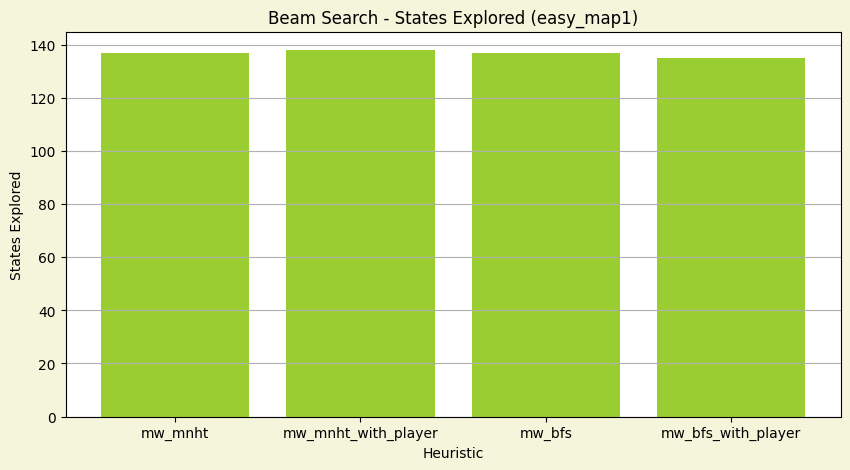

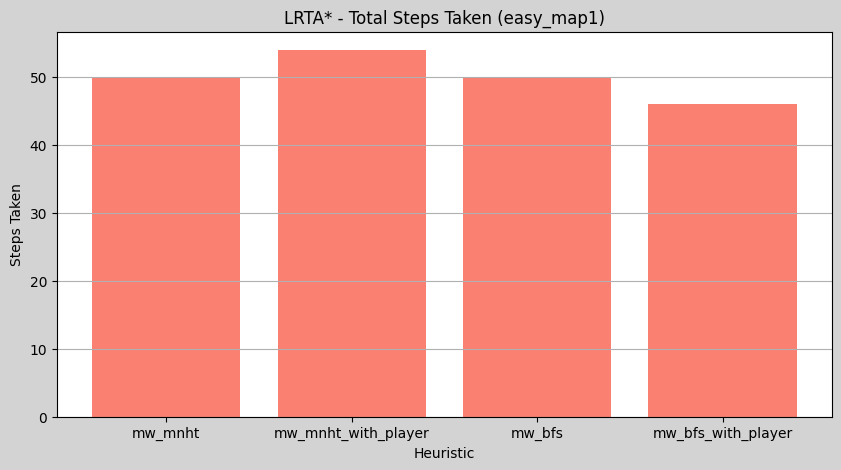

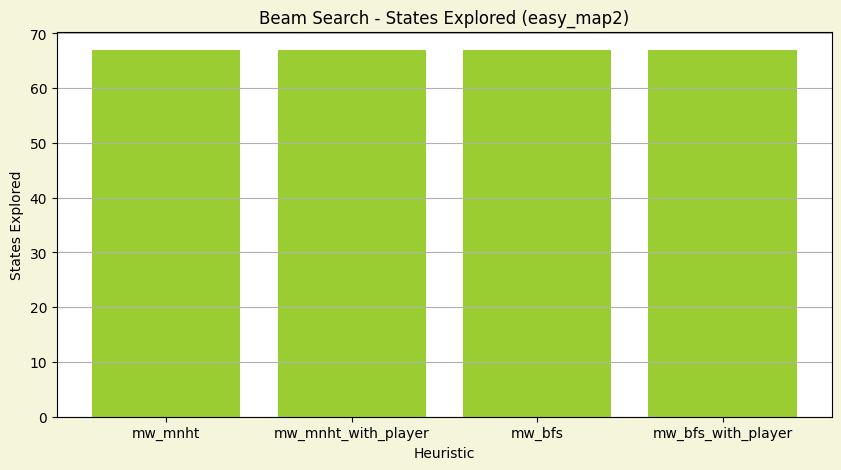

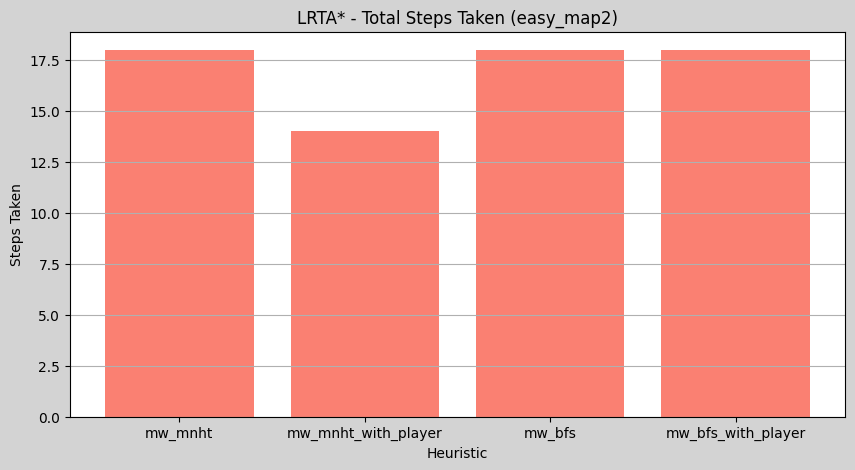

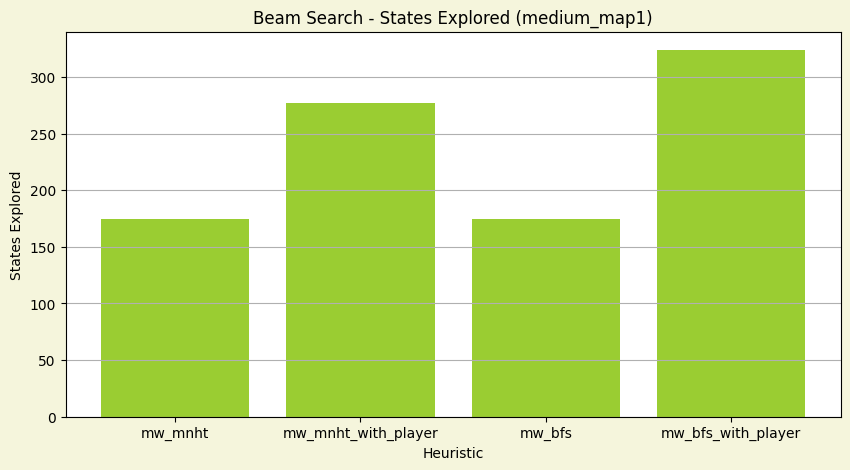

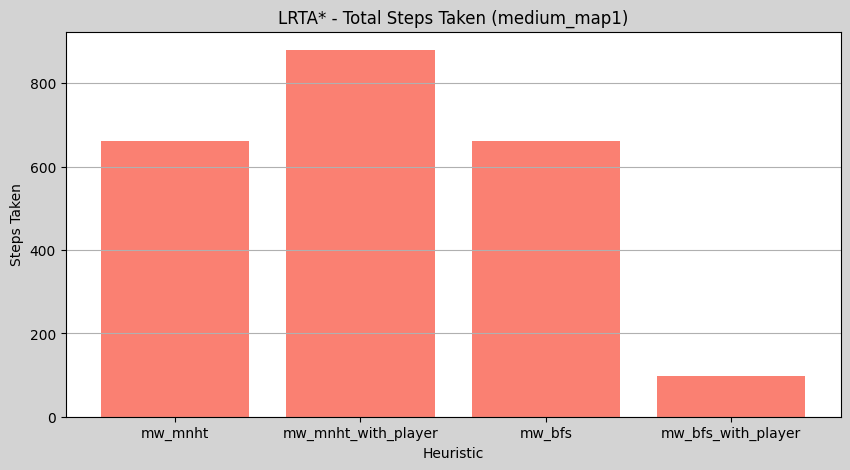

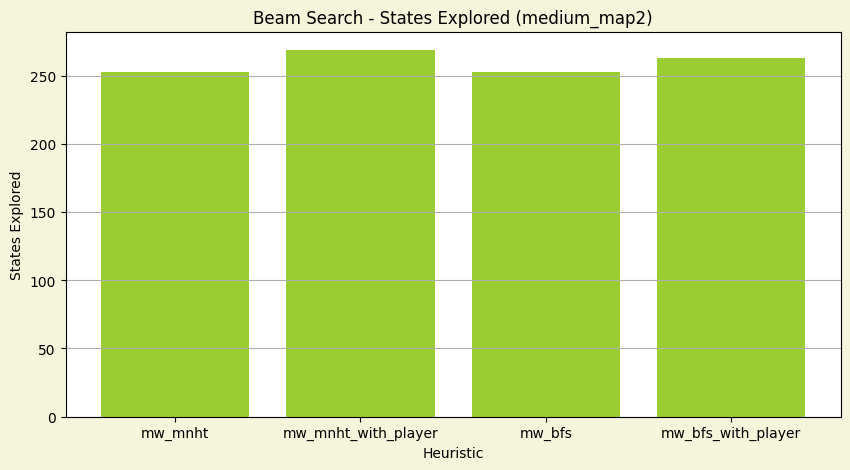

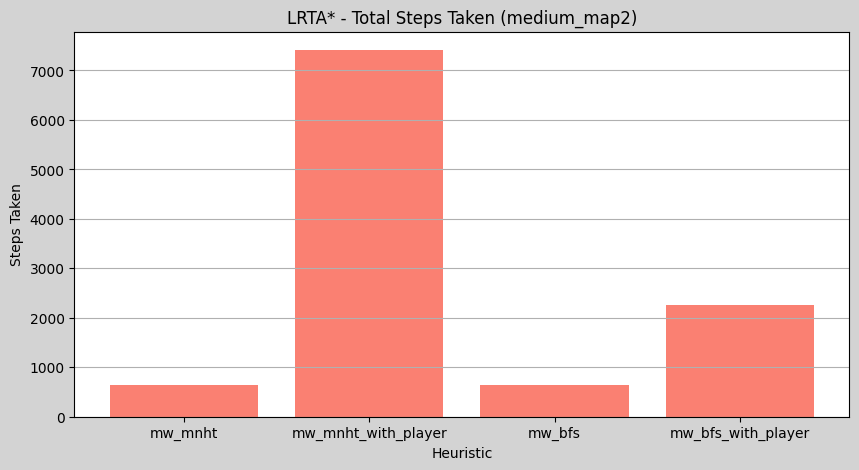

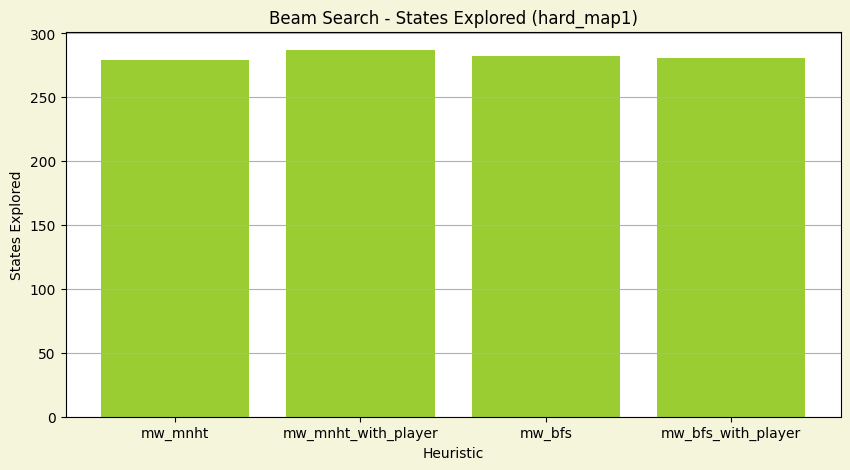

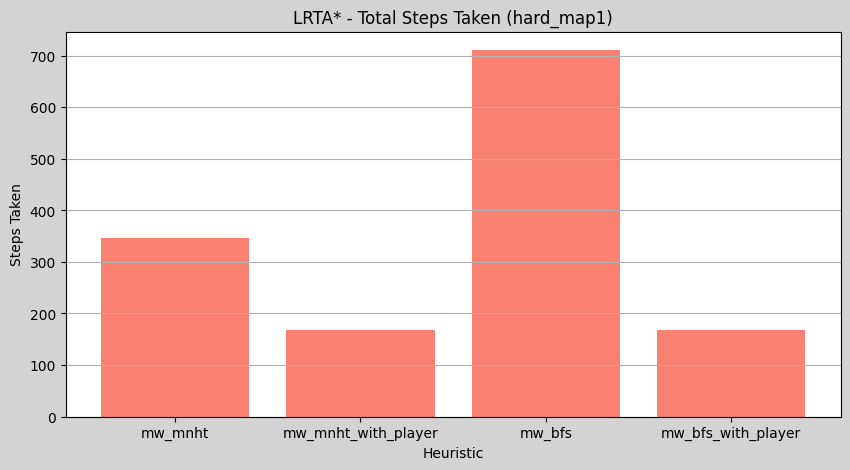

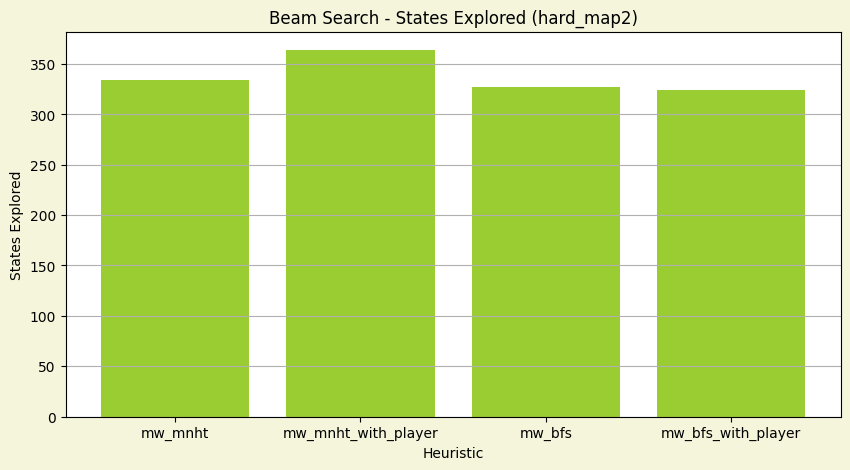

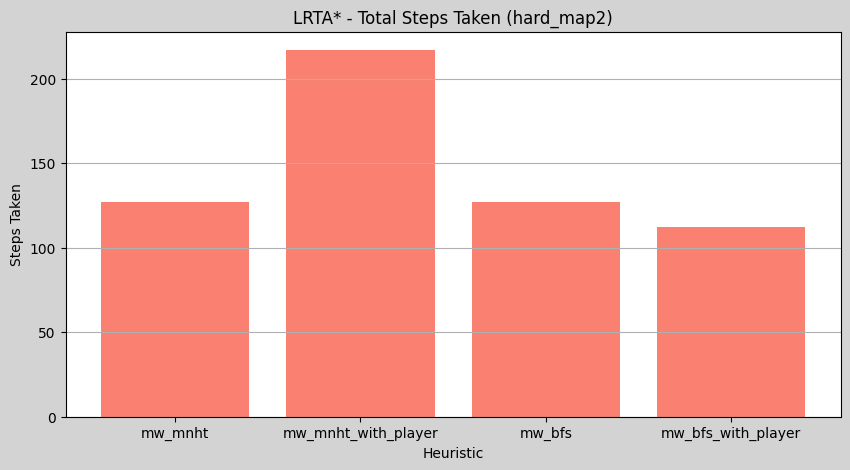

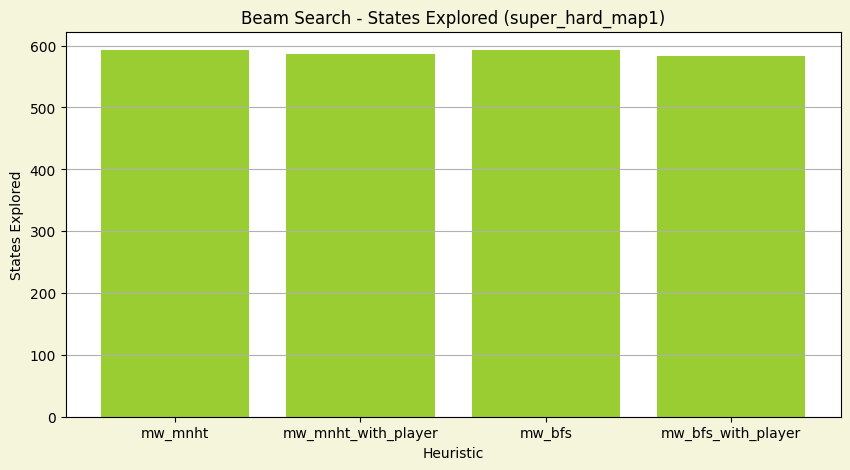

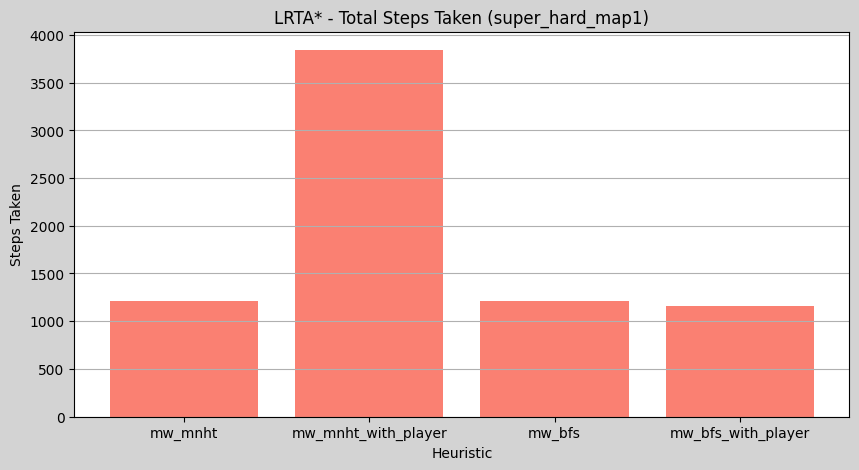

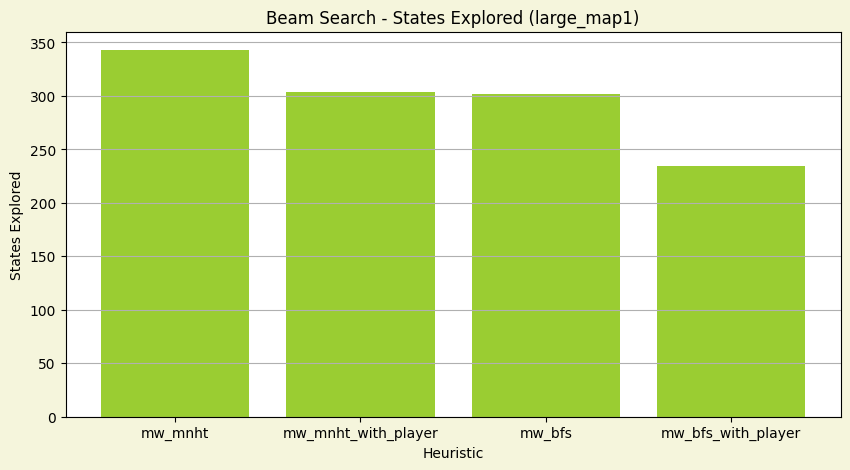

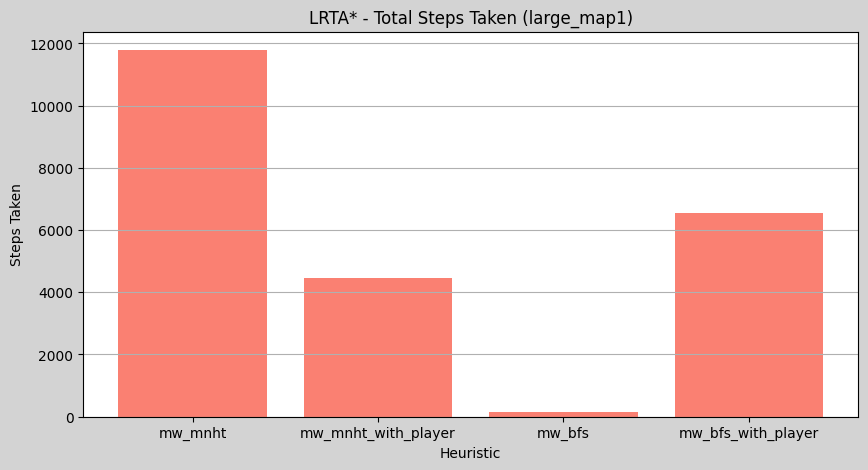

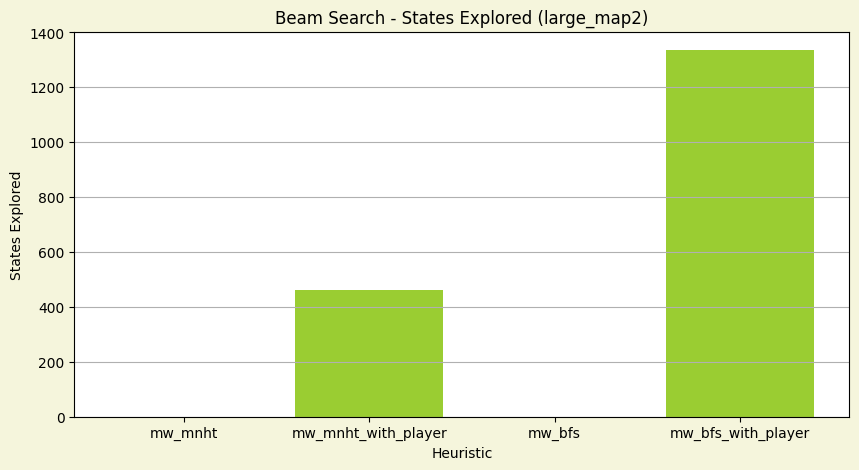

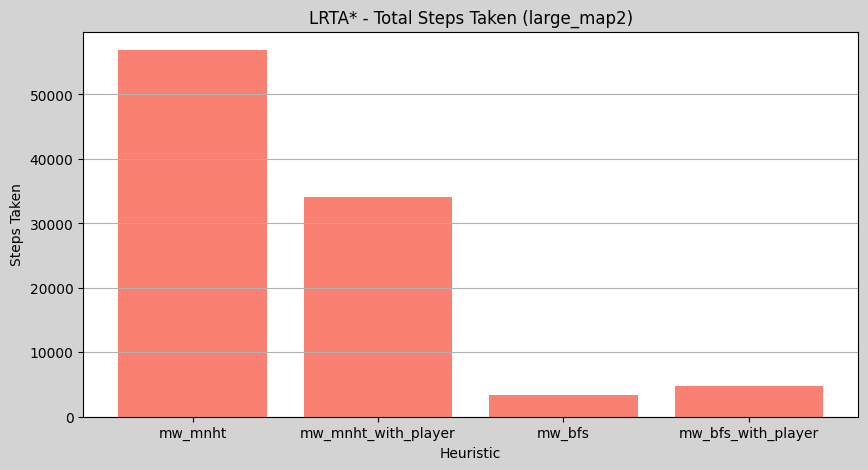

In [7]:
maps = ["easy_map1", "easy_map2", "medium_map1", "medium_map2", "hard_map1", "hard_map2", "super_hard_map1", "large_map1", "large_map2"]

# shorten names, so they fit in the graph
heuristics_names = [shorter.replace('manhattan', 'mnht') for shorter in [h.__name__.replace('min_weight', 'mw') for h in heuristics]]

for map_name in maps:
    # --- Beam Search (Explored States) ---
    fig, ax = plt.subplots(figsize=(10,5))
    fig.patch.set_facecolor('beige')      # figure background (outside the graph)
    ax.set_facecolor('white')             # plot background (inside the graph)

    ax.bar(heuristics_names, beam_search_explored_states[map_name], color='yellowgreen')
    ax.set_title(f'Beam Search - States Explored ({map_name})')
    ax.set_xlabel('Heuristic')
    ax.set_ylabel('States Explored')
    ax.grid(axis='y')
    plt.show()

    # --- LRTA* (Total Steps Taken) ---
    plt.figure(figsize=(10, 5), facecolor='lightgrey')
    plt.bar(heuristics_names, lrta_star_total_steps[map_name], color='salmon')
    plt.title(f'LRTA* - Total Steps Taken ({map_name})')
    plt.xlabel('Heuristic')
    plt.ylabel('Steps Taken')
    plt.grid(axis='y')
    plt.show()
